# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments

## <b> Data Description </b>
### Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### <b>Attribute Information: </b>
There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

Inspiration
Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?
Which variables are the strongest predictors of default payment?
Acknowledgements
Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here at the UCI Machine Learning Repository.




In [55]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [56]:
# importing tha dataset
data = pd.read_csv("data/UCI_Credit_Card.csv")

In [57]:
# First five rows of dataframe
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data Desciption: 

What we know about dataset :

We have records of 30000 customers. Below are the description of all features we have.

* ID: ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1 = male, 2 = female)

* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

* AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_0: Repayment status in September, 2005 (scale same as above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)

## Dataset Rows & Columns Count

In [58]:
# check data shape
data.shape

(30000, 25)

## Dataset Information

In [59]:
# Info on Non-Null Count and data type for each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [60]:
# Checking for null values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

- Dataset dose not contains any NA values, null values and duplicates.

In [61]:
# unique values in each column
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [62]:
# duplicate values in each column
data.duplicated().sum()

0

Hence no duplicates are present in the data.

In [63]:
# #Data Description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [64]:
#columns of dataset
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

*As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.*

## Data Processing

**Changing name of some columns for simplicity and better understanding**

In [65]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [66]:
#renaming of columns
data.rename(columns={'default.payment.next.month' : 'IsDefaulter'}, inplace=True)
data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [67]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [68]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')

In [69]:
#replacing values with labels
#replacing values with there labels
data.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
data.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
data.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
data.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [70]:
#checking for replaced labels
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


# **EDA (Exploratory Data Analysis)**

## **Dependent Variable:**

## Is Defaulter

In [71]:
#Value counts of Isdefaulter
data['IsDefaulter'].value_counts()

No     23364
Yes     6636
Name: IsDefaulter, dtype: int64

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

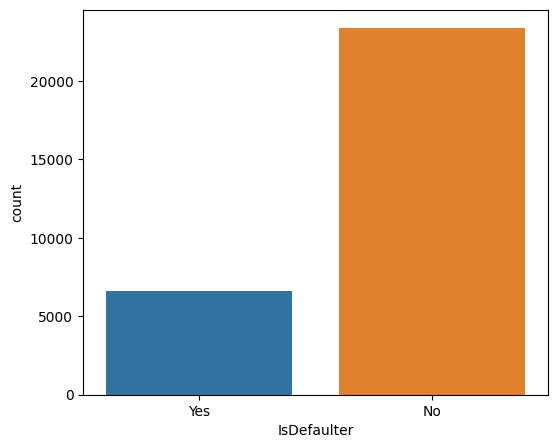

In [72]:
#value count plot for IsDefaulter
plt.figure(figsize=(6,5))
sns.countplot(x = 'IsDefaulter', data = data)

Here we can see defaulters are less as compare to Non defaulter in the given dataset, So we can say that we have imbalanced dataset

# Independent Variable

## 1. Categorical Features

We have few categorical features in our dataset. Let'Check how they are related with out target class.

### SEX

1 - Male  
2 - Female  

In [73]:
data['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

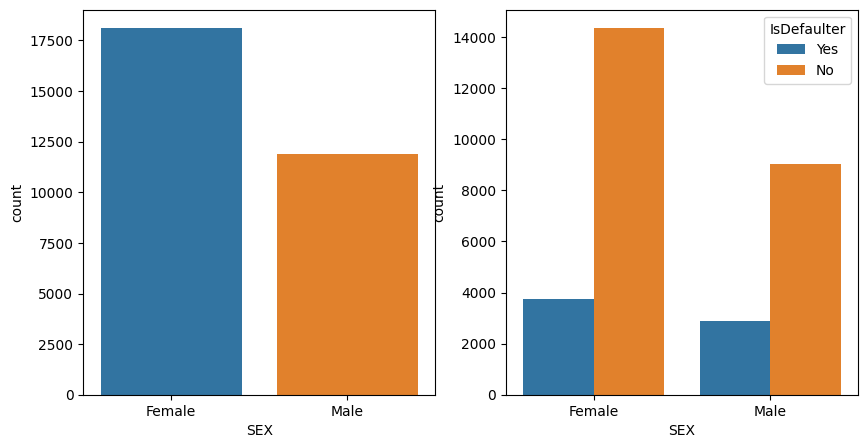

In [74]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = data)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = data)

### Education

1 = graduate school  
2 = university  
3 = high school  
4 = others  

In [75]:
data['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others

In [76]:
data[(data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
47,48,150000.0,Female,5,Single,46,0,0,-1,0,...,1170.0,0.0,0.0,1013.0,1170.0,0.0,0.0,0.0,0.0,Yes
69,70,20000.0,Male,5,Single,22,2,0,0,0,...,18085.0,11205.0,5982.0,0.0,1200.0,1000.0,500.0,1000.0,0.0,No
385,386,410000.0,Female,5,Married,42,0,0,0,0,...,240865.0,234939.0,240176.0,15000.0,14000.0,9000.0,8500.0,9000.0,8300.0,No
502,503,230000.0,Female,6,Single,46,0,0,0,0,...,186635.0,189896.0,193351.0,10000.0,9000.0,8000.0,8000.0,7500.0,7000.0,No
504,505,30000.0,Male,6,Married,53,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29811,29812,50000.0,Male,5,Single,46,0,0,0,-1,...,19183.0,19563.0,19157.0,1423.0,1000.0,19183.0,687.0,696.0,776.0,No
29836,29837,180000.0,Male,6,Married,34,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
29839,29840,150000.0,Male,5,Married,36,0,0,0,0,...,136378.0,139219.0,142172.0,5500.0,3800.0,3900.0,4000.0,4100.0,4100.0,No
29920,29921,50000.0,Male,5,Married,45,2,0,0,0,...,50947.0,51020.0,0.0,3000.0,3428.0,2002.0,1023.0,0.0,0.0,Yes


In [77]:
fil = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)
data.loc[fil, 'EDUCATION'] = 'Others'
data['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
Others               468
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

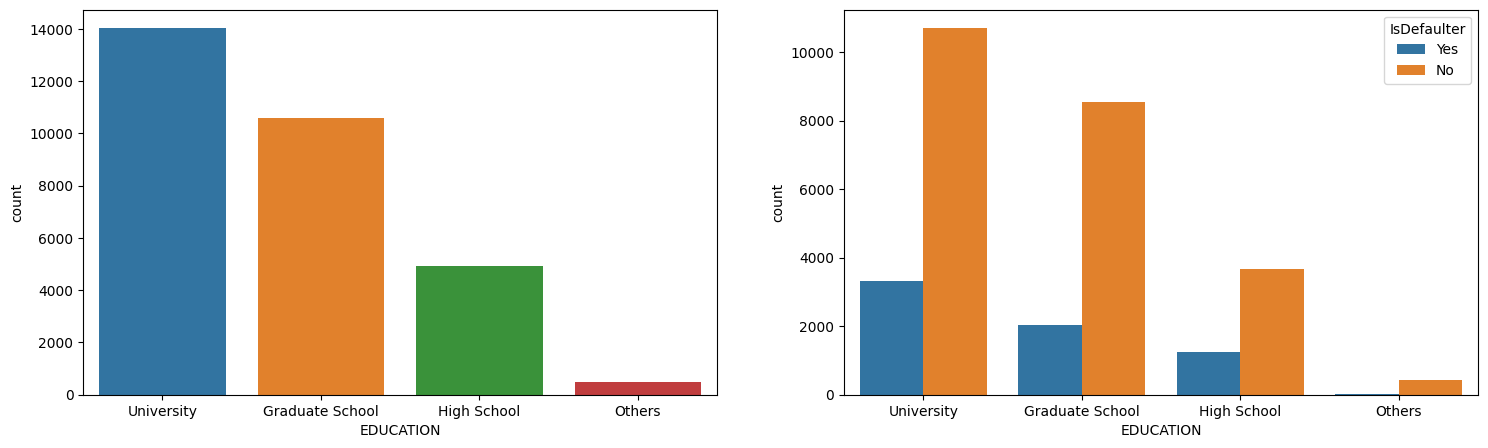

In [78]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = data)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = data)

### Marriage

1 = married   
2 = single   
3 = others  

In [79]:
data['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

In [80]:
fil = (data['MARRIAGE'] == 0)
data.loc[fil, 'MARRIAGE'] = "Others"
data['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

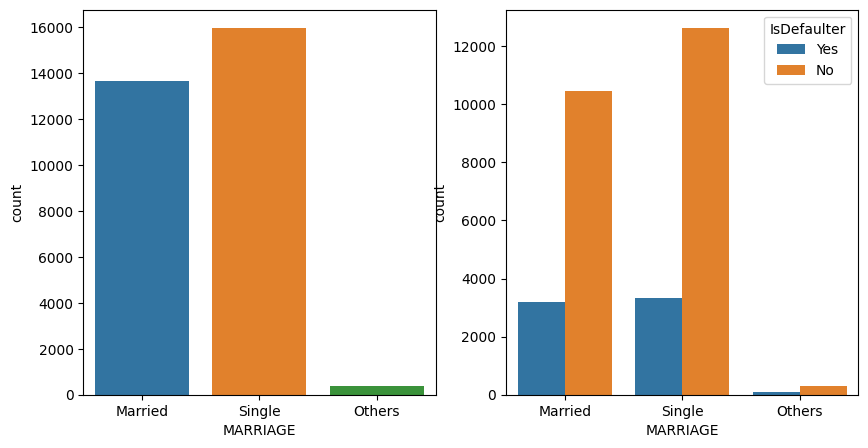

In [81]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = data)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = data)

### **Age**

Plotting graph of number of ages of all people with credit card irrespective of gender.

In [82]:
#age wise values of credit card holder
data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='count'>

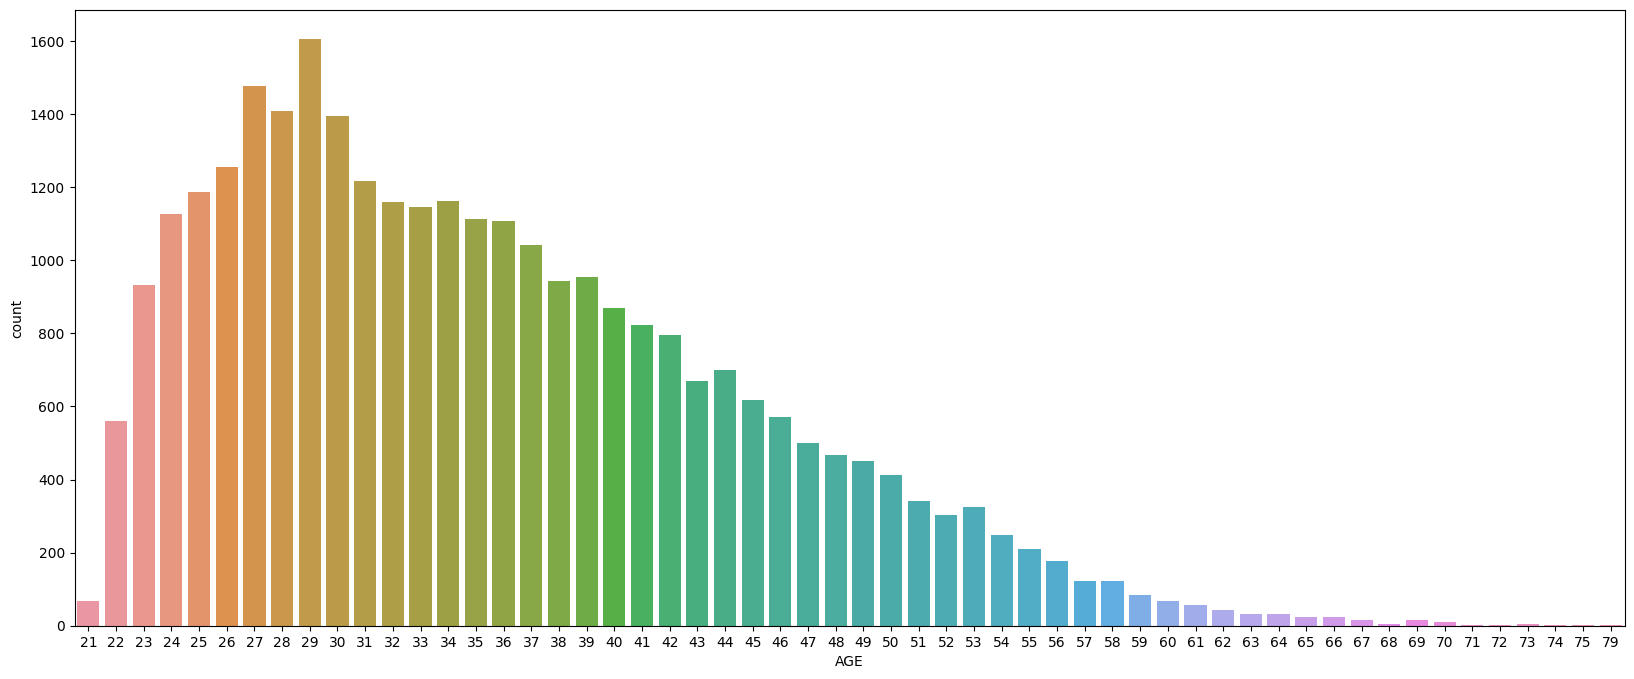

In [83]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = data)

<AxesSubplot:xlabel='AGE', ylabel='count'>

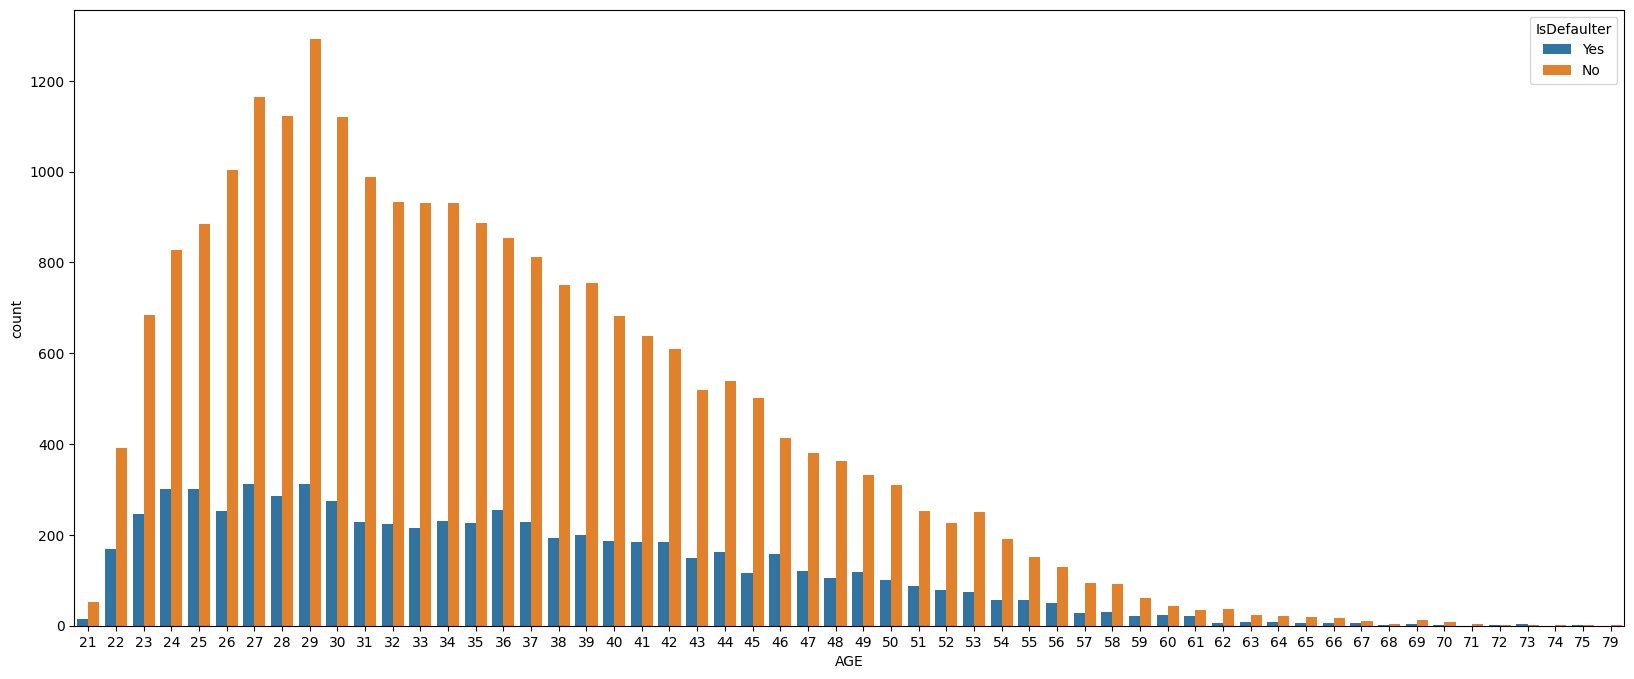

In [84]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = data)

Below are few observations for categorical features:

*   There are more females credit card holder,so no. of defaulter have high proportion of females.
*   No. of defaulters have a higher proportion of educated people  (graduate school and university)
*  No. of defaulters have a higher proportion of Singles.

### Plotting our categorical features

Below are few observations for categorical features:

1. There are more females credit card holder,so no. of defaulter have high proportion of females.
2. No. of defaulters have a higher proportion of educated people (graduate school and university)
3. No. of defaulters have a higher proportion of Singles.

## Checking Correlation



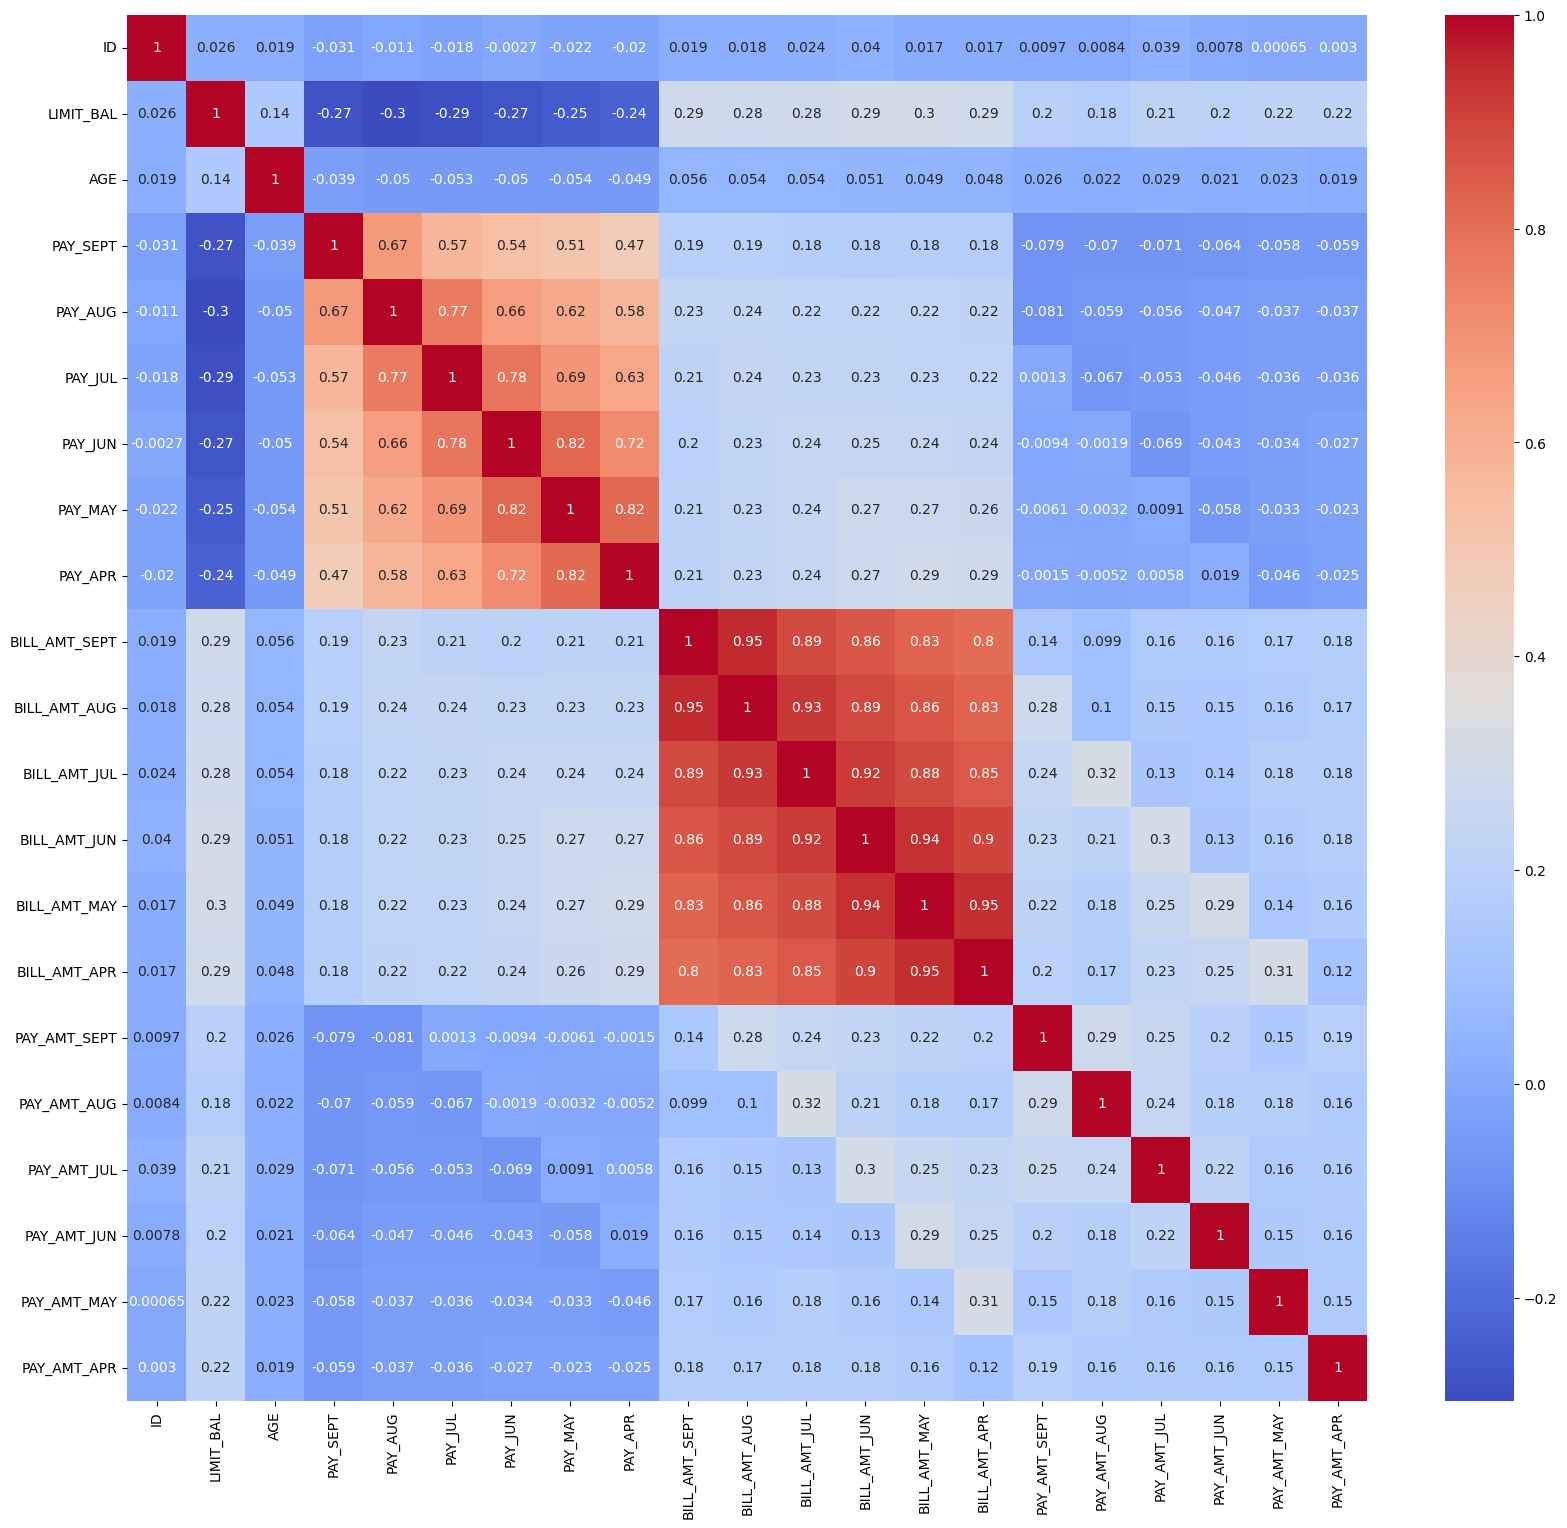

In [85]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.show()

## One Hot Encoding

In [86]:
#Label encoding 
encode_num = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1,"No":0}}
df=data.replace(encode_num)

In [87]:
#check for changed labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,0,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [88]:
df.shape

(30000, 25)

In [89]:
#creating dummy variables
df = pd.get_dummies(df, columns=['EDUCATION','MARRIAGE']) 

In [90]:
df.shape

(30000, 30)

In [91]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [92]:
df.shape

(30000, 28)

In [93]:
#creating dummy variables by droping first variable
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [94]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'MARRIAGE_Married', 'MARRIAGE_Single',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8',
       'PAY_MAY

In [95]:
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
#shape of dataset after creating dummy variables
df.shape

(30000, 80)

## Handling Class Imbalance

As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)


### **SMOTE** ***- Synthetic Minority Oversampling Technique***


In [97]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [98]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [99]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

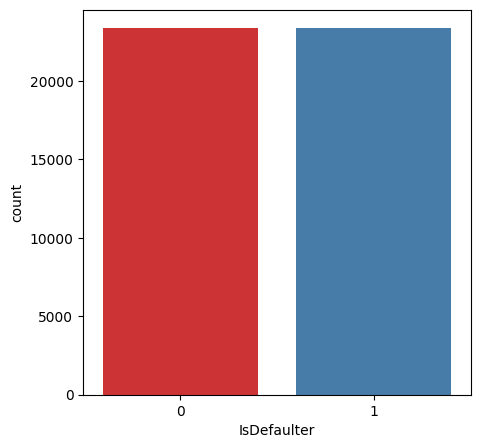

In [100]:
#checking for class imbalance
plt.figure(figsize=(5,5))
sns.countplot(x='IsDefaulter', data = balanced_df, palette = "Set1" )

In [101]:
#shape of balanced dataframe
balanced_df.shape

(46728, 80)

In [102]:
#removing feature ID from dataset
balanced_df.drop('ID',axis = 1, inplace = True)

In [103]:
#final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,1,0,0,0,0,0,0,0,0
3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,1,0,0,0,0,0,0,0,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,1,0,0,0,0,0,0,0,0


In [104]:
balanced_df.to_csv("EDA_FE.csv",index=False)